WEEK 3:

EFFICIENT FRONTIER (PART 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ret = pd.read_csv("data3_industry_30_vw_monthly.csv", header = 0, index_col=0)
ret.index = pd.to_datetime(ret.index, format ="%Y%M").to_period("M")
ret.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-01,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.91,-23.79,0.07,1.87,-0.02,5.20
1926-01,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,7.97,...,2.17,2.02,4.39,-2.38,4.85,5.39,-0.75,-0.13,4.47,6.76
1926-01,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.30,...,2.41,2.25,0.19,-5.54,0.07,-7.87,0.25,-0.56,-1.61,-3.86


In [3]:
ret.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [4]:
ret.columns = ret.columns.str.strip() 
ret.columns 

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
ret =ret/100
n_years =ret["2002":].shape[0]/12
eret = ((1+ret["2002":]).prod())**(1/n_years)-1
eret 


Food     0.083784
Beer     0.099543
Smoke    0.126471
Games    0.115264
Books    0.024621
Hshld    0.091162
Clths    0.143118
Hlth     0.089761
Chems    0.106661
Txtls    0.067471
Cnstr    0.097344
Steel    0.054575
FabPr    0.128211
ElcEq    0.106886
Autos    0.122103
Carry    0.111601
Mines    0.095039
Coal    -0.041202
Oil      0.065834
Util     0.087130
Telcm    0.062732
Servs    0.120181
BusEq    0.124272
Paper    0.079749
Trans    0.108146
Whlsl    0.095027
Rtail    0.117099
Meals    0.136763
Fin      0.071039
Other    0.050787
dtype: float64

<Axes: >

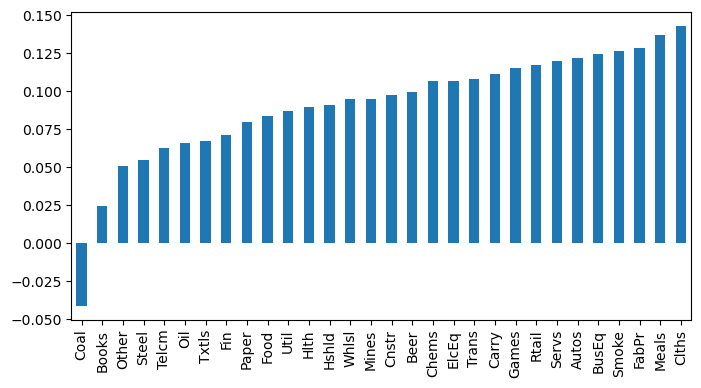

In [6]:
eret.sort_values().plot.bar(figsize=(8,4)) 
#eret.sort_values().plot.line(figsize=(8,4))

In [7]:
cov = ret["2002":].cov()*12
cov.shape


(30, 30)

In [8]:
cov.head(3)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.014584,0.011444,0.014720,0.018695,0.016820,0.011146,0.014478,0.010235,0.016717,0.021528,...,0.014347,0.013508,0.014819,0.013971,0.014024,0.014935,0.011871,0.012974,0.015314,0.013737
Beer,0.011444,0.017883,0.013826,0.013924,0.013194,0.011987,0.011975,0.010005,0.013547,0.016035,...,0.012279,0.010940,0.012070,0.012822,0.012322,0.012130,0.010532,0.011665,0.013083,0.012758
Smoke,0.014720,0.013826,0.045972,0.017741,0.017690,0.012106,0.013011,0.011872,0.014757,0.018106,...,0.016463,0.013424,0.016980,0.014890,0.014134,0.016097,0.009509,0.013073,0.015603,0.014752


## PORTFOLIO RETURN AND VOLATILITY

In [9]:
def port_ret(weights, ereturns):
    """
    weights + expected returns = portfolio returns

    """
    return weights.T@ereturns 

In [20]:
def port_vol(weights, covmat):
    """
    weights + covariance matrix = portfolio volatility
    """
    return (weights.T@covmat@weights)**0.5

In [21]:
l = ["Food","Beer","Smoke","Games"]
eret[l]

Food     0.083784
Beer     0.099543
Smoke    0.126471
Games    0.115264
dtype: float64

In [22]:
cov.loc[l,l]

,Food,Beer,Smoke,Games
Food,0.014584,0.011444,0.014720,0.018695
Beer,0.011444,0.017883,0.013826,0.013924
Smoke,0.014720,0.013826,0.045972,0.017741
Games,0.018695,0.013924,0.017741,0.064248


In [23]:
w = np.repeat(0.25,4)
w

array([0.25, 0.25, 0.25, 0.25])

In [24]:
port_ret(w,eret[l])

0.10626554205342381

In [25]:
port_vol(w, cov.loc[l,l])

0.1421674560754436

##  CASE OF TWO ASSETS

In [16]:
n_points =21
weights=[np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.05, 0.95]),
 array([0.1, 0.9]),
 array([0.15, 0.85]),
 array([0.2, 0.8]),
 array([0.25, 0.75]),
 array([0.3, 0.7]),
 array([0.35, 0.65]),
 array([0.4, 0.6]),
 array([0.45, 0.55]),
 array([0.5, 0.5]),
 array([0.55, 0.45]),
 array([0.6, 0.4]),
 array([0.65, 0.35]),
 array([0.7, 0.3]),
 array([0.75, 0.25]),
 array([0.8, 0.2]),
 array([0.85, 0.15]),
 array([0.9, 0.1]),
 array([0.95, 0.05]),
 array([1., 0.])]

In [17]:
l = ["Games", "Beer"]
ereturns = [port_ret(w,eret[l]) for  w in weights]

vols = [port_vol(w,cov.loc[l,l])for w in weights]

TypeError: 'tuple' object is not callable

In [ ]:
ef = pd.DataFrame({"Return":ereturns,"Risk":vols})
ef.head()